In [ ]:
#!pip install scipy

In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy import stats

### %matplotlib inline

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

In [7]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
      

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


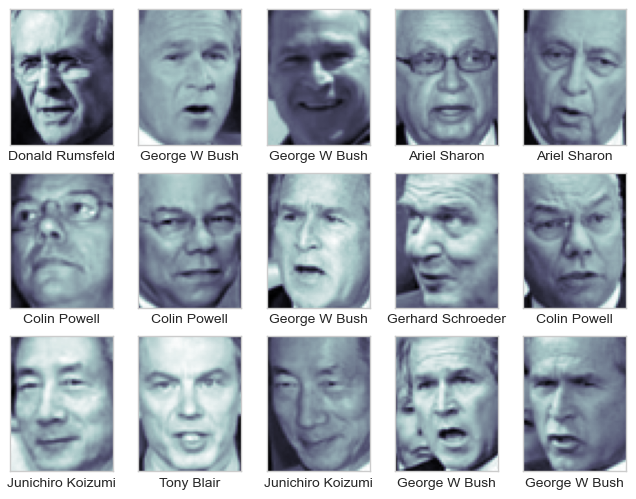

In [9]:
fig,ax = plt.subplots(3,5,figsize=(8,6))
for  i, axi in enumerate(ax.flat):
    axi. imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
    xlabel=faces.target_names[faces.target[i]])

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150, whiten=True,
         svd_solver='randomized', random_state=42)
svc =SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytttest = train_test_split(faces.data, faces.target, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid= {'svc__C':[1,5,10,50],
            'svc__gamma': [0.0001,0.0005,0.001, 0.005]}
grid = GridSearchCV (model, param_grid)

%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)
             

CPU times: total: 1min 54s
Wall time: 22.6 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [57]:
model=grid.best_estimator_
yfit=model.predict(Xtest)


ValueError: cannot reshape array of size 1850 into shape (62,47)

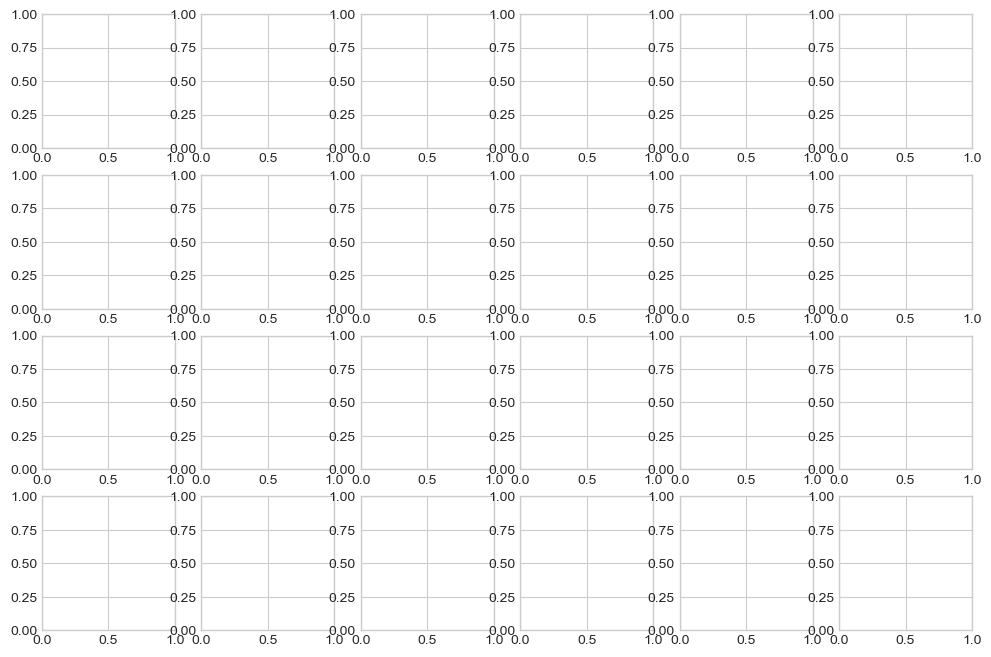

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Load and prepare the LFW dataset (or another dataset)
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = faces.data
y = faces.target

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply PCA and train a classifier
pca = PCA(n_components=150, whiten=True, random_state=42)
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(Xtrain_pca, ytrain)

# Predict on the test set
yfit = clf.predict(Xtest_pca)

# Now, we can use yfit and ytest in the following code
fig, ax = plt.subplots(4, 6, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')  # Assuming images are 62x47 pixels
    axi.set(xticks=[], yticks=[])
    
    # Label the image with the predicted name in black if correct, red if incorrect
    correct = yfit[i] == ytest[i]
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if correct else 'red')

# Title for the entire plot
fig.suptitle('Predicted Names; Incorrect labels in Red', size=14)
plt.show()


In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.54      0.70        13
     Colin Powell       0.66      0.98      0.79        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.84       322
        macro avg       0.91      0.72      0.78       322
     weighted avg       0.87      0.84      0.84       322

